# Lab 2 Modeling and Simulation of a Furuta Pendulum
#### This notebook contains code snippets to plot the data from the Furuta pendulum experiment, and to calculate the LQR gain vector for the double pendulum controller.

## Task 1 - Tune the dampening constants
#### We have gathered some data from a real furuta pendulum. The pendulum was dropped at an almost upright position and the resulting angles of the rotor and pendulum logged. Run the code below to load and plot the data.

In [26]:
# Import Pandas and MatPlotLib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as scipy
plt.rcParams['figure.figsize'] = [8, 4]

# Import the data from google drive using Pandas
furuta_data = pd.read_csv('https://drive.google.com/uc?export=dowload&id=1h_f8h-EVbuwfANGVZn-6tRICi-tEaMli')

In [ ]:
plt.figure(1)
plt.clf()
plt.plot(furuta_data.t, furuta_data.rotorPhi)
plt.title("Rotor angle")
plt.xlabel("time")
plt.ylabel("radians")

plt.figure(2)
plt.clf()
plt.plot(furuta_data.t, furuta_data.pendulumPhi)
plt.title("Pendulum angle")
plt.xlabel("time")
plt.ylabel("radians")

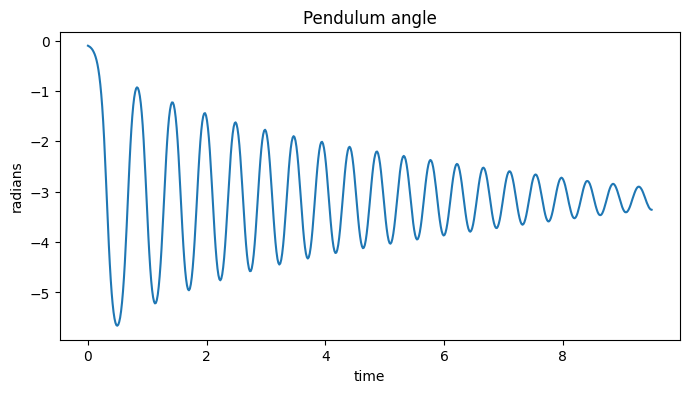

In [ ]:

plt.figure(2)
plt.clf()
plt.plot(furuta_data.t, furuta_data.pendulumPhi)
plt.title("Pendulum angle")
plt.xlabel("time")
plt.ylabel("radians")

In [27]:
-5.22/(-5.65)

0.9238938053097344

## Task 3 - Calculate the LQR gain vector
#### Create the linear state space model for the double pendulum, linearized around the downward position of the two pendulum arms

In [ ]:
import numpy as np
import scipy.linalg

# Initialize constants
J = 125e-06
l1 = 0.075
l2 = 0.030
m1 = l1*np.pi*0.0025*0.0025*3700
m2 = l2*np.pi*0.0025*0.0025*3700
r = 0.043
g = 9.82

# Parameter declaration
a1 = J + m1*r*r
b1 = 1/3 * m1*l1*l1
c1 = 1/2 * m1*r*l1
d1 = 1/2 * m1*g*l1

a2 = J + m2*r*r
b2 = 1/3 * m2*l2*l2
c2 = 1/2 * m2*r*l2
d2 = 1/2 * m2*g*l2

# State Space declaration
A = np.zeros((6,6))
A[0,1] = 1
A[1,2] = -(d1*c1)/(a1*b1 - c1**2)
A[1,4] = -(d2*c2)/(a2*b2 - c2**2)
A[2,3] = 1
A[3,2] = -(a1*d1)/(a1*b1 - c1**2)
A[4,5] = 1
A[5,4] = -(a2*d2)/(a2*b2 - c2**2)

B = np.zeros((6,1))
B[1,0] = b1/(a1*b1 - c1**2) + b2/(a2*b2 - c2**2)
B[3,0] = c1/(a1*b1 - c1**2)
B[5,0] = c2/(a2*b2 - c2**2)

#### Using the defined cost matrices, calculate the LQR gain by solving the continuous-time algebraic Riccati equation

In [ ]:
# Define the cost matrices
Q = np.zeros((6,6))
Q[0,0] = 1
Q[1,1] = 1e-3
Q[2,2] = 1
Q[3,3] = 1e-3
Q[4,4] = 1
Q[5,5] = 1e-3

R = np.zeros((1,1))
R[0,0] = 1e-4

# Solve the continuous-time algebraic Riccati equation
P = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))

# Calculate the LQR gain
L = scipy.linalg.solve(R, B.T*P)

print(L)